### Data Source
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

In [293]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [294]:
df = pd.read_csv('data.csv')

In [295]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [296]:
features = ['Make', 'Model', 'Year', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Vehicle Style',
       'highway MPG', 'city mpg', 'MSRP']

In [297]:
df_new = df[features].copy()

In [298]:
df_new.columns = df_new.columns.str.lower().str.replace(" ", "_")

In [299]:
df_new.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [300]:
df_new.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [301]:
df_new.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
dtype: object

In [302]:
df_new['engine_hp'] = df_new['engine_hp'].fillna(0)
df_new['engine_cylinders'] = df_new['engine_cylinders'].fillna(0)

In [303]:
categorical = list(df_new.dtypes[df_new.dtypes == 'object'].keys().values)
categorical

['make', 'model', 'transmission_type', 'vehicle_style']

In [304]:
for col in categorical:
    df_new[col] = df_new[col].str.lower().str.replace(" ", "_")

In [305]:
df_new['price'] = df_new['msrp']
del df_new['msrp']

#### What is the most frequent observation (mode) for the column transmission_type?
* AUTOMATIC

---

In [306]:
df_new['transmission_type'].value_counts()

transmission_type
automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: count, dtype: int64

#### Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset. What are the two features that have the biggest correlation in this dataset?
* `highway_mpg` and `city_mpg`

---

In [307]:
numerical = list(df_new.dtypes[(df_new.dtypes == 'int64') | (df_new.dtypes == 'float64')].keys().values)
numerical

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']

In [308]:
def corr_metrics(df: pd.DataFrame, cols):
    corr_df = pd.DataFrame()
    for col in cols:
        corr_df[col] = df[numerical].corrwith(df[col])
    return corr_df

In [309]:
corrs = corr_metrics(df_new, numerical)
corrs

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


<Axes: >

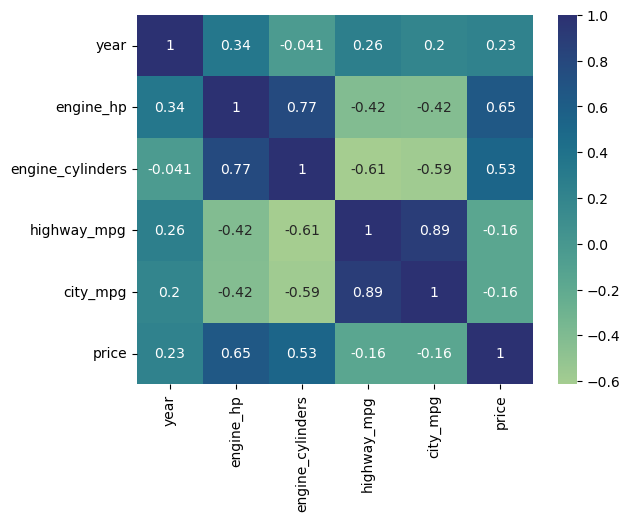

In [310]:
sns.heatmap(corrs, cmap="crest", annot=True)

<Axes: xlabel='price', ylabel='Count'>

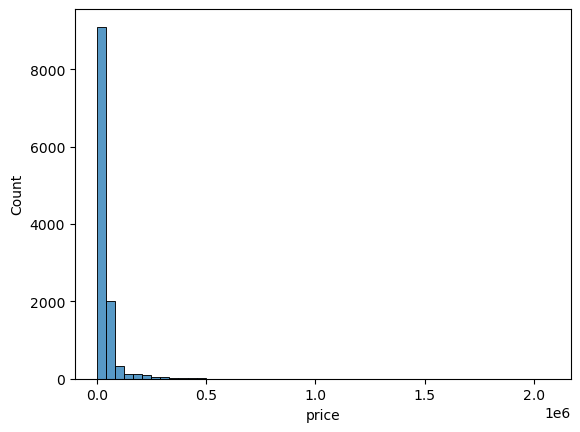

In [311]:
sns.histplot(df_new['price'], bins=50)

In [312]:
df_new_copy = df_new.copy()

In [313]:
df_new['above_average'] = (df_new.price > df_new.price.mean()).astype(int)
del df_new['price']
df_new

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,1
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,1
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,1
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,1


In [314]:
from sklearn.model_selection import train_test_split

In [315]:
train_full, test = train_test_split(df_new, test_size=0.2, random_state=42)

In [316]:
train, val  = train_test_split(train_full, test_size=0.25, random_state=42)

In [317]:
len(df_new), len(train), len(val), len(test)

(11914, 7148, 2383, 2383)

In [318]:
def X_and_y(df: pd.DataFrame):
    return df.drop(columns='above_average'), df.above_average

In [319]:
X_train, y_train = X_and_y(train)
X_val, y_val = X_and_y(val)
X_test, y_test = X_and_y(test)

In [320]:
from sklearn.metrics import mutual_info_score

In [321]:
def mutual_info(series: pd.Series):
    return mutual_info_score(series, y_train)

#### Which of these variables has the lowest mutual information score?
* transmission_type

In [322]:
mutual_information = X_train[categorical].apply(mutual_info)
mutual_information.sort_values(ascending=True)

transmission_type    0.020958
vehicle_style        0.084143
make                 0.239769
model                0.462344
dtype: float64

---

In [323]:
from sklearn.feature_extraction import DictVectorizer

In [338]:
dv = DictVectorizer(sparse=False)

In [339]:
X_train_arr = dv.fit_transform(X_train.to_dict(orient='records'))

In [340]:
len(dv.get_feature_names_out())

943

In [341]:
from sklearn.linear_model import LogisticRegression

In [342]:
model = LogisticRegression(max_iter=1000, C=10, solver='liblinear', random_state=42)

In [343]:
model.fit(X_train_arr, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [344]:
X_val_arr = dv.transform(X_val.to_dict(orient='records'))

In [345]:
len(dv.get_feature_names_out())

943

In [346]:
accuracy = ((model.predict_proba(X_val_arr)[:,1] > 0.5) == y_val).mean()
accuracy

0.9454469156525388

#### What accuracy did you get?
* 0.95

---

In [347]:
feature_eliminattion_candidates = ['year', 'engine_hp', 'transmission_type', 'city_mpg']

In [350]:
def accuracy_without_features(X, y, X_val, y_val, features):
    dv_local = DictVectorizer(sparse=False)
    result = pd.Series()
    for col in features:
        X = X.copy()
        X_arr = dv_local.fit_transform(X.drop(col, axis=1).to_dict(orient='records'))
        model = LogisticRegression(max_iter=1000, C=10, solver='liblinear', random_state=42)
        model.fit(X_arr, y)
        X_val_arr = dv_local.transform(X_val.copy().drop(col, axis=1).to_dict(orient='records'))
        result[col] = ((model.predict_proba(X_val_arr)[:,1] > 0.5) == y_val).mean()
    return result

In [351]:
acc = accuracy_without_features(X_train, y_train, X_val, y_val ,feature_eliminattion_candidates)
acc

year                 0.947965
engine_hp            0.924045
transmission_type    0.947965
city_mpg             0.946706
dtype: float64

In [352]:
accuracy - acc

year                -0.002518
engine_hp            0.021402
transmission_type   -0.002518
city_mpg            -0.001259
dtype: float64

#### calculate the difference between the original accuracy and the accuracy without the feature. Which of following feature has the smallest difference?
* city_mpg (In case of abs diff)
* year and transmission_type (with sign included)

---

In [353]:
df_2 = df_new_copy.copy()
df_2.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


<Axes: xlabel='price', ylabel='Count'>

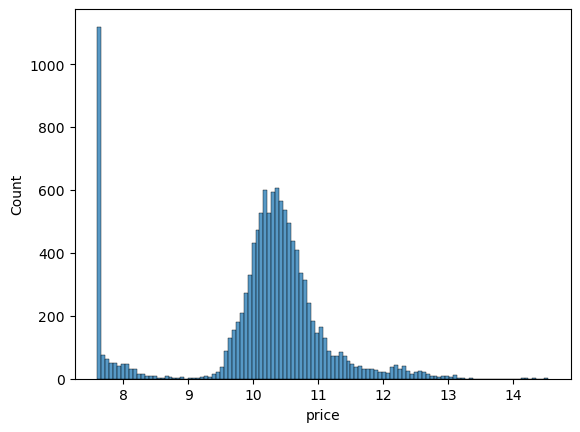

In [354]:
sns.histplot(np.log1p(df_2.price))

In [355]:
df_2['price_log'] = np.log1p(df_2.price)
del df_2['price']

In [357]:
df_2.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price_log
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,10.739349
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,10.612779
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,10.500977
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,10.290483
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,10.448744


In [360]:
train_full, test = train_test_split(df_2, test_size=0.2, random_state=42)
train, val  = train_test_split(train_full, test_size=0.25, random_state=42)

In [361]:
def X_and_y(df: pd.DataFrame):
    return df.drop(columns='price_log'), df.price_log

In [380]:
X_train, y_train = X_and_y(train)
X_val, y_val = X_and_y(val)
X_test, y_test = X_and_y(test)

In [387]:
dv = DictVectorizer(sparse=False)
X_train_arr = dv.fit_transform(X_train.to_dict(orient='records'))

In [373]:
from sklearn.linear_model import Ridge

In [375]:
ridge_model = Ridge(alpha=0.1, max_iter=10000, random_state=42, solver='sag')

In [376]:
ridge_model.fit(X_train_arr, y_train)

Ridge(alpha=0.1, max_iter=10000, random_state=42, solver='sag')

In [388]:
X_val_arr = dv.transform(X_val.to_dict(orient='records'))

In [393]:
y_val_pred = ridge_model.predict(X_val_arr)

In [405]:
def rmse(y_pred, y):
    sq_error = 0
    for ypp, yp in list(zip(y_pred, y)):
        sq_error += np.power((ypp-yp), 2)
    return np.sqrt(sq_error/len(y_pred))

In [397]:
rmse(y_val_pred, y_val)

0.42088347607574905

In [401]:
def model_for_alphas(alphas: list[float]):
    models = {}
    for alpha in alphas:
        ridge_model = Ridge(alpha=alpha, max_iter=10000, random_state=42, solver='sag')
        print(f"Training for alpha = {alpha}")
        ridge_model.fit(X_train_arr, y_train)
        models[alpha] = ridge_model
    return models

In [400]:
alphas = [0, 0.01, 0.1, 1, 10]
models = model_for_alphas(alphas)

In [402]:
models

{0: Ridge(alpha=0, max_iter=10000, random_state=42, solver='sag'),
 0.01: Ridge(alpha=0.01, max_iter=10000, random_state=42, solver='sag'),
 0.1: Ridge(alpha=0.1, max_iter=10000, random_state=42, solver='sag'),
 1: Ridge(alpha=1, max_iter=10000, random_state=42, solver='sag'),
 10: Ridge(alpha=10, max_iter=10000, random_state=42, solver='sag')}

In [410]:
rmse_X = []
rmse_y = []
for alpha in models.keys():
    y_val_pred = models[alpha].predict(X_val_arr)
    rmse_val = rmse(y_val_pred, y_val)
    rmse_X.append(alpha)
    rmse_y.append(rmse_val)
    print(f"Alpha: {alpha}\trmse: {rmse_val}")

Alpha: 0	rmse: 0.4208212060336974
Alpha: 0.01	rmse: 0.4208249578612805
Alpha: 0.1	rmse: 0.42088347607574905
Alpha: 1	rmse: 0.4214776197656953
Alpha: 10	rmse: 0.42733214479855236


<Axes: >

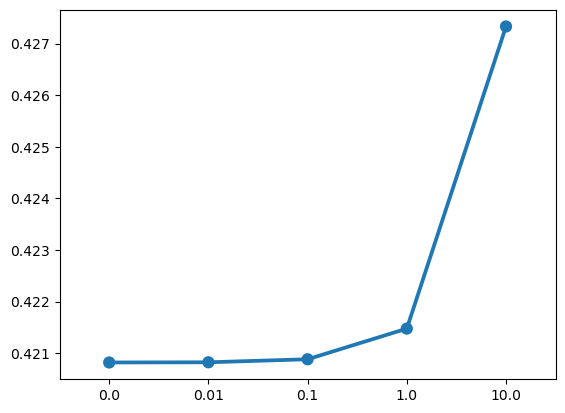

In [412]:
sns.pointplot(x=rmse_X, y=rmse_y)

#### Which of these alphas leads to the best RMSE on the validation set?
* 0